In [1]:

import pandas as pd
import urllib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os
import numpy as np
from operator import itemgetter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
# requirements : 
#     recommended platform : ubuntu
#     python == 3.7
#     pip install pandas
#     pip install numpy
#     pip install sklearn
#     pip install seaborn
#     pip install matplotlib
%matplotlib inline

# DATASET
Data Source
    
    https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation
    
    Source:
    Rajen Bhatt, Abhinav Dhall, rajen.bhatt '@' gmail.com, IIT Delhi.
    
    Data Set Information:

        The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.
        
    Attribute Information:

        This dataset is of the dimension 245057 * 4 where first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y).
        
    Relevant Papers:


1. Rajen B. Bhatt, Gaurav Sharma, Abhinav Dhall, Santanu Chaudhury, â€œEfficient skin region segmentation using low complexity fuzzy decision tree modelâ€, IEEE-INDICON 2009, Dec 16-18, Ahmedabad, India, pp. 1-4.
        2. Abhinav Dhall, Gaurav Sharma, Rajen Bhatt, Ghulam Mohiuddin Khan, â€œAdaptive Digital Makeupâ€, in Proc. of International Symposium on Visual Computing (ISVC) 2009, Nov. 30 â€“ Dec. 02, Las Vegas, Nevada, USA, Lecture Notes in Computer Science, Vol. 5876, pp. 728-736.



        Citation Request:

        Rajen Bhatt, Abhinav Dhall, 'Skin Segmentation Dataset', UCI Machine Learning Repository


    

### DOWNLOAD DATASET
    Direct Link : https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

#### DOWNLOAD USING PYTHON

In [2]:
if not os.path.exists('./Skin_NonSkin.txt'):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
    urllib.request.urlretrieve(url,'./Skin_NonSkin.txt')

#### Read using pandas

In [3]:
df = pd.read_csv('Skin_NonSkin.txt', sep='\t',names =['B','G','R','skin'])
df.head()

,B,G,R,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check Missing values

In [4]:
# NO MISSING VALUES
df.isna().sum()

B       0
G       0
R       0
skin    0
dtype: int64

### Standardize dataset

In [5]:
feature = df[df.columns[~df.columns.isin(['skin'])]] #Except Label
label = (df[['skin']] == 1)*1 #Converting to 0 and 1 (this col has values 1 and 2)
feature = feature / 255. #Pixel values range from 0-255 converting between 0-1

In [6]:
feature.head()

,B,G,R
0,0.290196,0.333333,0.482353
1,0.286275,0.329412,0.478431
2,0.282353,0.325490,0.474510
3,0.274510,0.317647,0.466667
4,0.274510,0.317647,0.466667


In [7]:
label.head()

,skin
0,1
1,1
2,1
3,1
4,1


### Explore your data
    Please try to understand the nature of data

In [8]:
alldf = pd.concat([feature,label], sort=True, axis=1)
alldf.head()

,B,G,R,skin
0,0.290196,0.333333,0.482353,1
1,0.286275,0.329412,0.478431,1
2,0.282353,0.325490,0.474510,1
3,0.274510,0.317647,0.466667,1
4,0.274510,0.317647,0.466667,1


In [9]:
sample = alldf.sample(1000)

In [10]:
onlybgr = sample[sample.columns[~sample.columns.isin(['skin'])]]

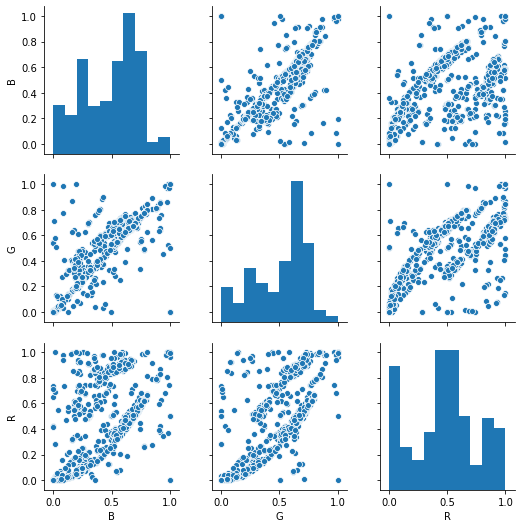

In [11]:
sns.pairplot(onlybgr)

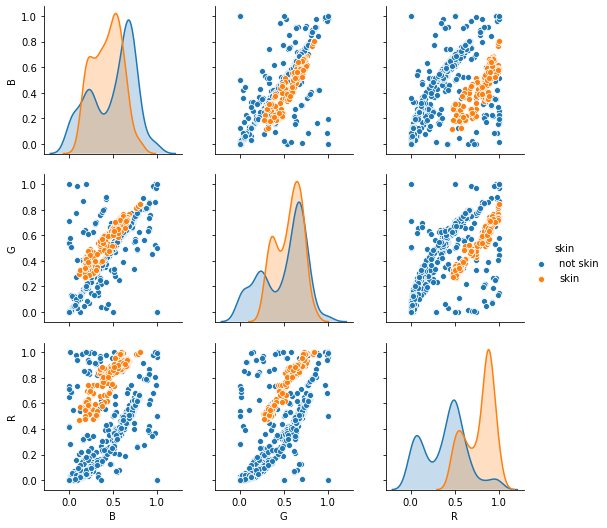

In [12]:
sample_ = sample.copy()
sample_['skin'] = sample.skin.apply(lambda x:{1:'skin',0:'not skin'}.get(x))
sns.pairplot(sample_, hue="skin")
# sample

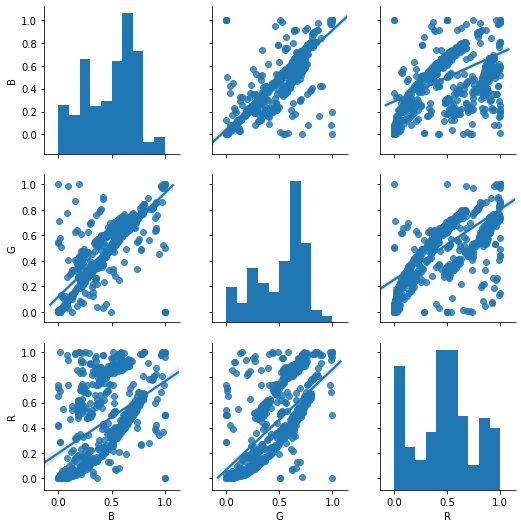

In [13]:
sns.pairplot(onlybgr, kind="reg")

In [14]:
# Lets see how many 0s and 1s
(label == 0).skin.sum(),(label == 1).skin.sum()

(194198, 50859)

## SPLIT DATA INTO 5 CROSS - VALIDATION

In [7]:
x = feature.values
y = label.values

NameError: name 'feature' is not defined

In [8]:
# We will keep fix test and take 5 cross validation set
# so we will have five different data set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

NameError: name 'x' is not defined

In [9]:
#Lets see the size of xtrain, xtest
len(xtrain),len(xtest)

NameError: name 'xtrain' is not defined

In [10]:
# 5 Fold Split
# First merge xtrain and ytrain so that we can easily divide into 5 chunks

data = np.concatenate([xtrain,ytrain],axis = 1)
# Observe the shape of array
xtrain.shape,ytrain.shape,data.shape

NameError: name 'xtrain' is not defined

In [19]:
# Divide our data to 5 chunks
chunks = np.split(data,5)

In [20]:
datadict = {'fold1':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold2':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold3':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}}, 
            'fold4':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold5':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},}

In [4]:
for i in range(5):
    datadict['fold'+str(i+1)]['val']['x'] = chunks[i][:,0:3]
    datadict['fold'+str(i+1)]['val']['y'] = chunks[i][:,3:4]
    
    idx = list(set(range(5))-set([i]))
    X = np.concatenate(itemgetter(*idx)(chunks),0)
    datadict['fold'+str(i+1)]['train']['x'] = X[:,0:3]
    datadict['fold'+str(i+1)]['train']['y'] = X[:,3:4]
    

NameError: name 'chunks' is not defined

In [5]:
def writepickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def readpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [6]:
writepickle(datadict,'data.pkl')

NameError: name 'datadict' is not defined

## Now You Can Read This Pickle File And Use In Your Project

In [54]:
data = readpickle('data.pkl')

## How to access data
    Example : Access fold1 data

In [8]:
#Added the variable total_val to keep track of all the val accuracy same goes for test. 
#You will see print statements commented out. I left them here so you can still check and make sure the value is correct. 

In [9]:
total_val = 0
total_test = 0


In [10]:
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']

xtrain, ytrain = fold1_train['x'],fold1_train['y']
xval, yval = fold1_val['x'], fold1_val['y']
xtest, ytest = fold1_test['x'],fold1_test['y']

In [11]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [12]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [13]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

<h1 style="color:green">!!!!!!!!!! NOTES !!!!!!!!!!</h1>

    This walkthrough is just to make your life easier
    If you want to use your own ways of doing data processing it is fine
    You can continue your assignment right-away from below or setup 
    a project like assignment 1. You can use any library you want

<h1 style="color:red">!!!!!!!!!! WARNING !!!!!!!!!!</h1>

    1. DO NOT SUBMIT .DOCX FILE
    2. NAME YOUR FILE IN FOLLOWING MANNER net_id_homework_2.pdf
    3. SUBMIT BOTH ASSIGNMENT(OPENED) AND YOUR DROPBOX
    4. YOUR REPORT SHOULD CONTAIN LINK TO YOUR GITHUB 
    5. ADD COMMENTS TO INCREASE READIBILITY IN YOUR CODE

### Now use above dataset to complete following work

# Assignment 2
    You can use any libraires you want, but choose python as your platform
    
    1. Implement Logistic Regression on this 5 fold data
    2. Report Test Accuracy, Val Accuracy on each fold
       Follow following format
       ________________________
       
            |  ACCURACY   
       FOLD | VAL | TEST  
       ________________________
            |     |
       1    |  ?? |  ??
       2    |  ?? |  ??
       3    |  ?? |  ??
       4    |  ?? |  ??
       5    |  ?? |  ??
       ________________________
       AVG  |  ?? |  ??
       
    3. Report Visualization
    
    NOTE :  You must submit two things
            First : A pdf report with following explanation
                    - What tools you used and why?
                    - Metrics as explained in (2)
                    - Visualization/Graph
                    - Conclude your experiment
                    - Add a github repo as report

            Second : A github repo
    

# My code


## Here I am opening the Folds

In [14]:
# I am leaving some of the print statements to you can check and make sure it is getting the right number. 

In [15]:
logReg = LogisticRegression()

In [16]:
logReg.fit(xtrain,ytrain)
f1_val = logReg.score(xval, yval)
print (f1_val)

total_val = total_val + f1_val
#print(total_val)

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9188961717972914


In [17]:
f1_test = logReg.score(xtest, ytest)
print (f1_test)
total_test = total_test + f1_test
#print(total_test)

0.9189178160450502


In [18]:
fold2 = data['fold2']
fold2_train = fold2['train']
fold2_val = fold2['val']
fold2_test = fold2['test']

xtrain, ytrain = fold2_train['x'],fold2_train['y']
xval, yval = fold2_val['x'], fold2_val['y']
xtest, ytest = fold2_test['x'],fold2_test['y']

In [19]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [20]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [21]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

In [22]:
f2_train=logReg.fit(xtrain,ytrain)
f2_val =logReg.score(xval,yval)
print (f2_val)
total_val = total_val + f2_val
#print (total_val)


C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9177229717666863


In [23]:
f2_test=logReg.score(xtest,ytest)
print (f2_test)
total_test = total_test + f2_test
#print (total_test)

0.9188974128784787


In [24]:
fold3 = data['fold3']
fold3_train = fold3['train']
fold3_val = fold3['val']
fold3_test = fold3['test']

xtrain, ytrain = fold3_train['x'],fold3_train['y']
xval, yval = fold3_val['x'], fold3_val['y']
xtest, ytest = fold3_test['x'],fold3_test['y']

In [25]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [26]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [27]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

In [28]:
logReg.fit(xtrain,ytrain)
f3_val=logReg.score(xval,yval)
print (f3_val)
total_val = total_val + f3_val
#print (total_val)

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9197123109490168


In [29]:
f3_test = logReg.score(xtest,ytest)
print (f3_test)
total_test = total_test + f3_test
#print (total_test)

0.9187341875459071


In [30]:
fold4 = data['fold4']
fold4_train = fold4['train']
fold4_val = fold4['val']
fold4_test = fold4['test']

xtrain, ytrain = fold4_train['x'],fold4_train['y']
xval, yval = fold4_val['x'], fold4_val['y']
xtest, ytest = fold4_test['x'],fold4_test['y']

In [31]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [32]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [33]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

In [34]:
logReg.fit(xtrain,ytrain)
f4_val =logReg.score(xval,yval)
print (f4_val)
total_val = total_val + f4_val
#print (total_val)

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9184370935244459


In [35]:
f4_test = logReg.score(xtest,ytest)
print(f4_test)
total_test = total_test + f4_test
#print (total_test)

0.9193462825430507


In [36]:
fold5 = data['fold5']
fold5_train = fold5['train']
fold5_val = fold5['val']
fold5_test = fold5['test']

xtrain, ytrain = fold5_train['x'],fold5_train['y']
xval, yval = fold5_val['x'], fold5_val['y']
xtest, ytest = fold5_test['x'],fold5_test['y']

In [37]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [38]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [39]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

In [40]:
logReg.fit(xtrain,ytrain)
f5_val = logReg.score(xval,yval)
print (f5_val)
                      
total_val = total_val + f5_val
#print(total_val)

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9196357979035426


In [41]:
f5_test = logReg.score(xtest,ytest)
print (f5_test)
total_test = total_test + f5_test
#print( total_test)

0.9189178160450502


In [42]:
# In order to get the average I needed to divide by 5 becuase there are 5 folds. 

In [43]:
avg_val = total_val/5
avg_test = total_test/5


In [44]:
print (avg_val)
print (avg_test)

0.9188808691881967
0.9189627030115073


### Here I am displaying the tables

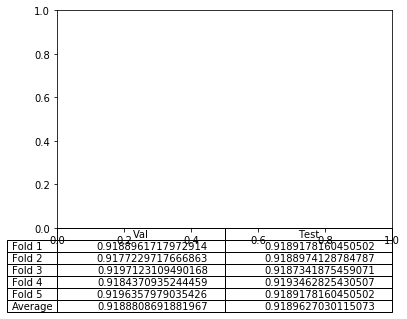

In [46]:
data = [[ f1_val, f1_test],
        [ f2_val,f2_test],
        [ f3_val, f3_test],
        [ f4_val, f4_test],
        [ f5_val, f5_test],
        [ avg_val, avg_test]]

columns = ('Val', 'Test')
rows = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average']

my_table = plt.table (cellText= data,
                     rowLabels = rows,
                     colLabels = columns,
                     )
plt.show(my_table)

In [47]:
# Here I am displaying the bar graph for Accucracy for VAl and Test

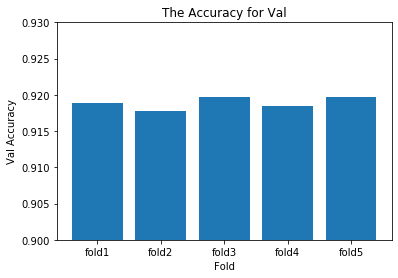

In [48]:
xaxis_val = [ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']
yaxis_val = [f1_val, f2_val, f3_val, f4_val, f5_val]
plt.xlabel("Fold")
plt.ylabel("Val Accuracy")
plt.title("The Accuracy for Val")
plt.ylim(0.90,0.93)
plt.bar(xaxis_val, yaxis_val)
plt.show()


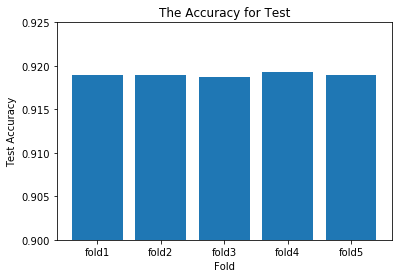

In [49]:
xaxis_test = [ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']
yaxis_test = [f1_test, f2_test, f3_test, f4_test, f5_test]
plt.xlabel("Fold")
plt.ylabel("Test Accuracy")
plt.title("The Accuracy for Test")
plt.ylim(0.90,0.925)
plt.bar(xaxis_test, yaxis_test)
plt.show()


# My better code

## Important! must go back and read data again after running the code above for this code below to work. 

In [55]:
class LogReg(object):
    def __init__(self, data):
        self.data = data
        
    def initialize_model(self, scikitmodel,**kwargs):
        self.model = scikitmodel(**kwargs)
        self.fittedmodel = self.model.fit(self.data['train']['x'], self.data['train']['y'])            
    
    def evaluate(self, on = 'train'):
        return self.fittedmodel.score(self.data[on]['x'],self.data[on]['y'])
    
    def automate(self, **kwargs):
        self.initialize_model(LogisticRegression, **kwargs)
        metrics = {}
        for on in ['train','val','test']:
            metrics[on] = self.evaluate(on)
        metrics.update(kwargs)
        return metrics

In [56]:
# need this so i can run different iterations on each fold. 
foldkeys = list(data.keys())
nlist = list(range(10,110,10))

In [57]:
#I am using a for loop to open each fold and calling autmate so it can do all the trianing. 
from itertools import product
combo = [*product(foldkeys, nlist)]

results = []
for fold, max_iter in combo:
    model = LogReg(data[fold])
    out = model.automate(max_iter = max_iter)
    out.update({'data':fold})
    results.append(out)

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eguia\Anaconda3\lib\site-packages\sklearn\linear_

## Visuals

In [58]:
# We need to import pandas to do the graphs

In [59]:
import pandas as pd

In [60]:
df = pd.DataFrame(data = results)

In [61]:
import seaborn as sns

In [62]:
df

,data,max_iter,test,train,val
0,fold1,10,0.918918,0.918877,0.918896
1,fold1,20,0.918918,0.918877,0.918896
2,fold1,30,0.918918,0.918877,0.918896
3,fold1,40,0.918918,0.918877,0.918896
4,fold1,50,0.918918,0.918877,0.918896
5,fold1,60,0.918918,0.918877,0.918896
6,fold1,70,0.918918,0.918877,0.918896
7,fold1,80,0.918918,0.918877,0.918896
8,fold1,90,0.918918,0.918877,0.918896
9,fold1,100,0.918918,0.918877,0.918896


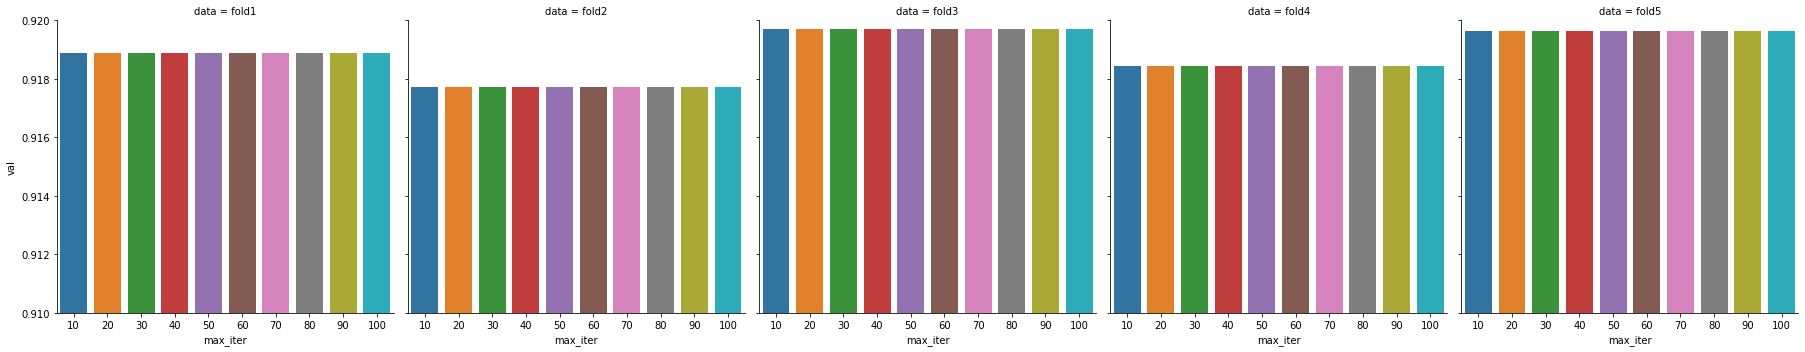

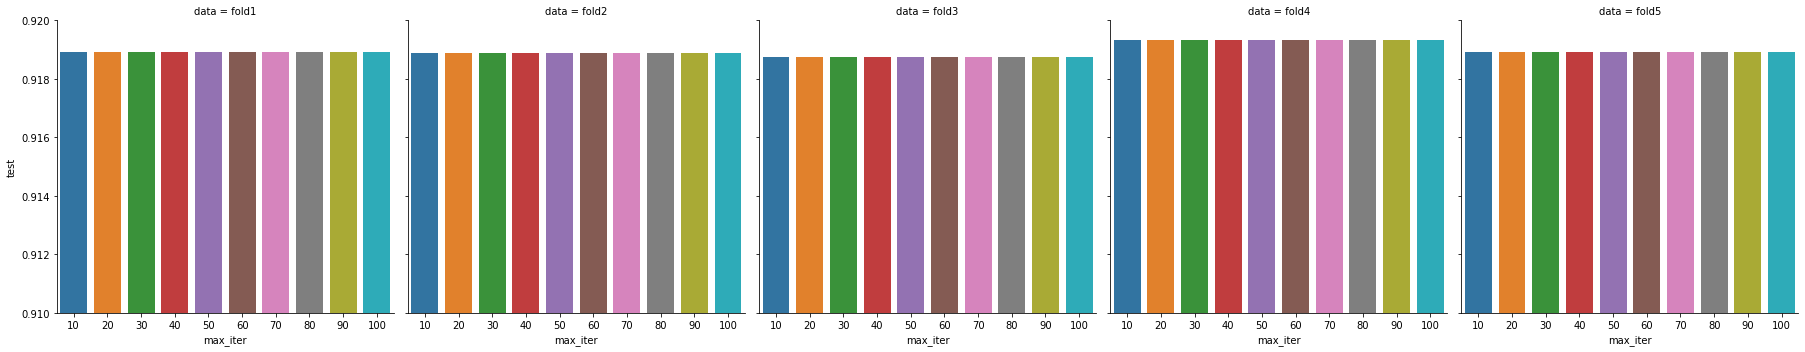

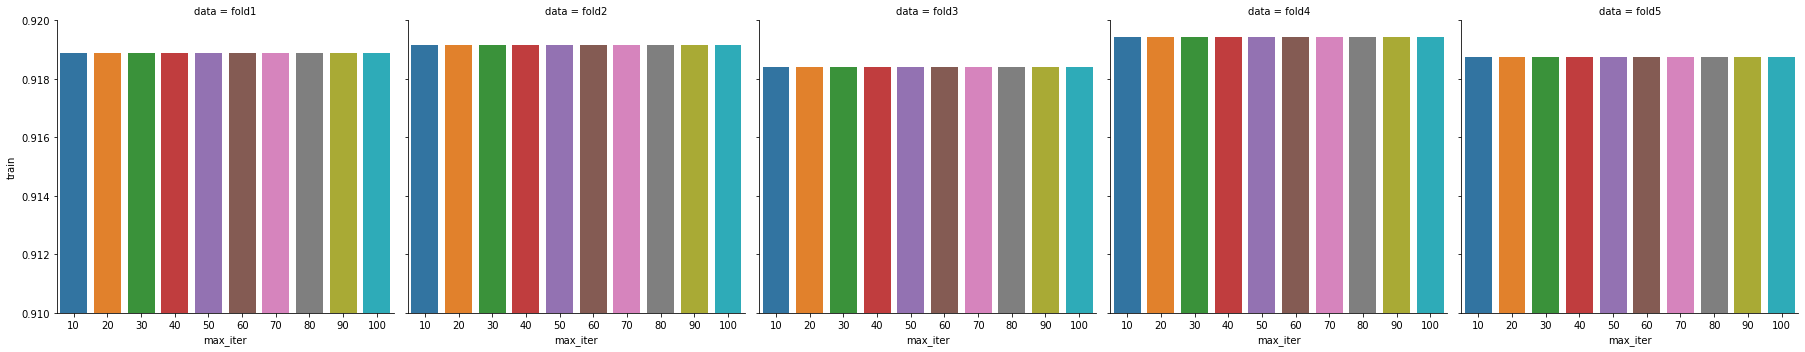

In [63]:
a = sns.catplot(data = df, x = 'max_iter', y = 'val', col = 'data', kind = 'bar',height=5)
b = sns.catplot(data = df, x = 'max_iter', y = 'test', col = 'data', kind = 'bar')
c= sns.catplot(data = df, x = 'max_iter', y = 'train', col = 'data', kind = 'bar')
a.set(ylim=(0.91,0.92))
b.set(ylim=(0.91,0.92))
c.set(ylim=(0.91,0.92))